In [ ]:
#standard libaries
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sea
import missingno as msso
import plotly.express as px
import matplotlib

In [ ]:
#reading data using pandas
item_store = pd.read_excel("Item_details.xlsx")
sales_data = pd.read_csv("sales_data.csv",index_col=['Transaction_Date'], parse_dates=['Transaction_Date'])
store_details = pd.read_excel("Store_details.xlsx")
wastege_data = pd.read_csv("wastage_data.csv")

In [ ]:
sales_data["Year"] = sales_data.index.year
sales_data["month"] = sales_data.index.month
sales_data["date"] = sales_data.index.date
sales_data["month_name"] = pd.to_datetime(sales_data['date']).dt.strftime("%B")
sales_data['date'] = pd.to_datetime(sales_data['date'])
sales_data['dayofweek'] = sales_data['date'].dt.strftime("%A")
sales_data['dayofmonth'] = sales_data['date'].dt.day
sales_data['quarter'] = sales_data['date'].dt.quarter

In [ ]:
sales_data.head()

Location_ID  Product_ID  Sales_Value  Qty_Sold  \
Transaction_Date                                                   
2017-06-16                202      100701         44.1       1.0   
2017-06-17                202      100701         49.0       1.0   
2017-06-18                202      100701         93.1       2.0   
2017-06-20                202      100701          0.0       0.0   
2017-06-26                202      100701          0.0       0.0   

                  Total_Transactions  Year  month       date month_name  \
Transaction_Date                                                          
2017-06-16                     397.0  2017      6 2017-06-16       June   
2017-06-17                    1275.0  2017      6 2017-06-17       June   
2017-06-18                    1165.0  2017      6 2017-06-18       June   
2017-06-20                     389.0  2017      6 2017-06-20       June   
2017-06-26                     780.0  2017      6 2017-06-26       June   

                 dayofweek  dayofmonth  quarter  
Transaction_Date                                 
2017-06-16          Friday          16        2  
2017-06-17        Saturday          17        2  
2017-06-18          Sunday          18        2  
2017-06-20         Tuesday          20        2  
2017-06-26          Monday          26        2

In [ ]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1666538 entries, 2017-06-16 to 2019-12-31
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   Location_ID         1666538 non-null  int64         
 1   Product_ID          1666538 non-null  int64         
 2   Sales_Value         1666538 non-null  float64       
 3   Qty_Sold            1666538 non-null  float64       
 4   Total_Transactions  1666538 non-null  float64       
 5   Year                1666538 non-null  int64         
 6   month               1666538 non-null  int64         
 7   date                1666538 non-null  datetime64[ns]
 8   month_name          1666538 non-null  object        
 9   dayofweek           1666538 non-null  object        
 10  dayofmonth          1666538 non-null  int64         
 11  quarter             1666538 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(6), object(2)
m

In [ ]:
sales_data.isnull().sum()

Location_ID           0
Product_ID            0
Sales_Value           0
Qty_Sold              0
Total_Transactions    0
Year                  0
month                 0
date                  0
month_name            0
dayofweek             0
dayofmonth            0
quarter               0
dtype: int64

In [ ]:
sales_data.shape

(1666538, 12)

In [ ]:
sales_data.describe()

Location_ID    Product_ID   Sales_Value      Qty_Sold  \
count  1.666538e+06  1.666538e+06  1.666538e+06  1.666538e+06   
mean   2.062826e+02  1.009399e+05  1.448872e+03  4.836152e+01   
std    2.742039e+00  1.436031e+02  3.658423e+03  1.406073e+02   
min    2.020000e+02  1.007010e+05  0.000000e+00  0.000000e+00   
25%    2.040000e+02  1.008220e+05  8.999600e+01  1.642000e+00   
50%    2.060000e+02  1.009200e+05  3.560000e+02  7.523000e+00   
75%    2.090000e+02  1.010760e+05  1.316911e+03  3.700000e+01   
max    2.120000e+02  1.012000e+05  2.612683e+05  1.461800e+04   

       Total_Transactions          Year         month    dayofmonth  \
count        1.666538e+06  1.666538e+06  1.666538e+06  1.666538e+06   
mean         9.014731e+02  2.017587e+03  6.562264e+00  1.579809e+01   
std          5.327345e+02  1.109694e+00  3.445121e+00  8.806598e+00   
min          0.000000e+00  2.016000e+03  1.000000e+00  1.000000e+00   
25%          4.850000e+02  2.017000e+03  4.000000e+00  8.000000e+00   
50%          8.240000e+02  2.018000e+03  7.000000e+00  1.600000e+01   
75%          1.208000e+03  2.019000e+03  1.000000e+01  2.300000e+01   
max          4.109000e+03  2.019000e+03  1.200000e+01  3.100000e+01   

            quarter  
count  1.666538e+06  
mean   2.518865e+00  
std    1.117287e+00  
min    1.000000e+00  
25%    2.000000e+00  
50%    3.000000e+00  
75%    4.000000e+00  
max    4.000000e+00

In [ ]:
pd.pivot_table(sales_data,values= 'Qty_Sold',index = "Year",aggfunc=sum).style.background_gradient(cmap='Blues')

In [ ]:
fig = px.line(pd.pivot_table(sales_data,values= 'Qty_Sold',index = "Year",aggfunc=sum),title="Quantity Sold based on Year",color_discrete_sequence=['red'])
fig.update_layout(xaxis_title="Year",yaxis_title="Qty_Sold")

In [ ]:
def plotMovingAverage(series, win, scale=2.0):
    roll_mean = series.rolling(window=win).mean()
    plt.figure(figsize=(12, 8))
    plt.plot(roll_mean, 'g', label='rolling mean {}'.format(scale))
    
    mea = mean_absolute_error(series[win:], roll_mean[win:])
    deviation = np.std(series[win:] - roll_mean[win:])
    lower_bound = roll_mean - (mea + scale * deviation)
    upper_bound = roll_mean + (mea + scale * deviation)
    plt.plot(lower_bound, 'r--', label='upper/lower bound')
    plt.plot(upper_bound, 'r--')
    
    anomaly = pd.DataFrame(index=series.index, columns=series.columns)
    anomaly[series<lower_bound] = series[series<lower_bound]
    anomaly[series>upper_bound] = series[series>upper_bound]
    plt.plot(anomaly, 'r.', label='Anomaly')
    
    plt.plot(series, 'b', label='Real Data', alpha=0.3)
    plt.title('Moving Average Plot')
    plt.grid(True)
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
sd = pd.DataFrame({"Qty_Sold":sales_data['Qty_Sold']})

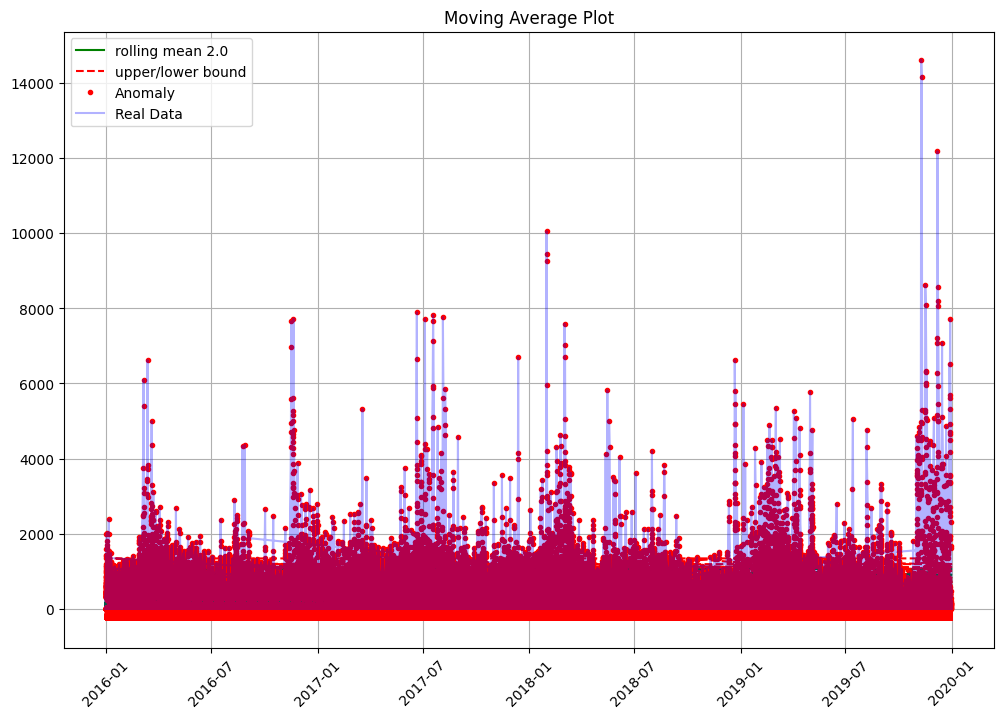

In [ ]:
plotMovingAverage(sd,win = 24*30)

In [ ]:
def exponantialSmooth(series, alpha):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append((alpha * series[n]) + ((1 - alpha) * result[n-1]))
    return result

In [ ]:
def plotExpoSmooth(series, alphas):
    with plt.style.context('ggplot'):
        plt.figure(figsize=(12, 8))
        for alpha in alphas:
            plt.plot(exponantialSmooth(series, alpha), label='Alpha {}'.format(alpha))
        plt.plot(series.values, 'c', label='Actual', alpha=0.4)
        plt.title('Exponantial Average')
        plt.axis('tight')
        plt.legend(loc='best')
        plt.grid(True)
        plt.show()

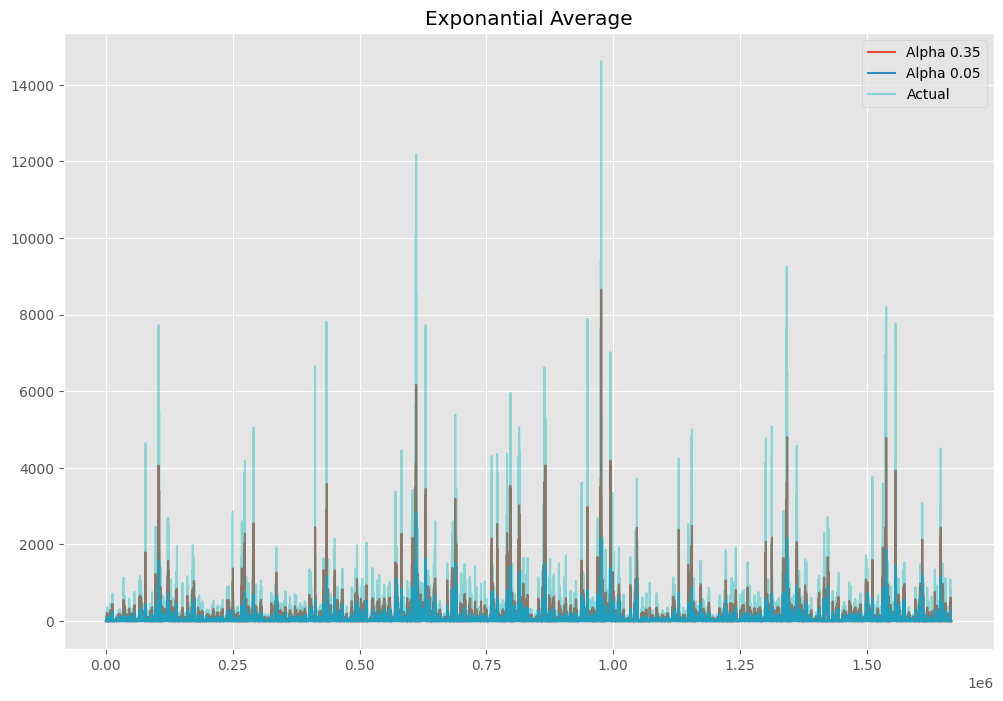

In [ ]:
plotExpoSmooth(sales_data.Qty_Sold, [0.35, 0.05])


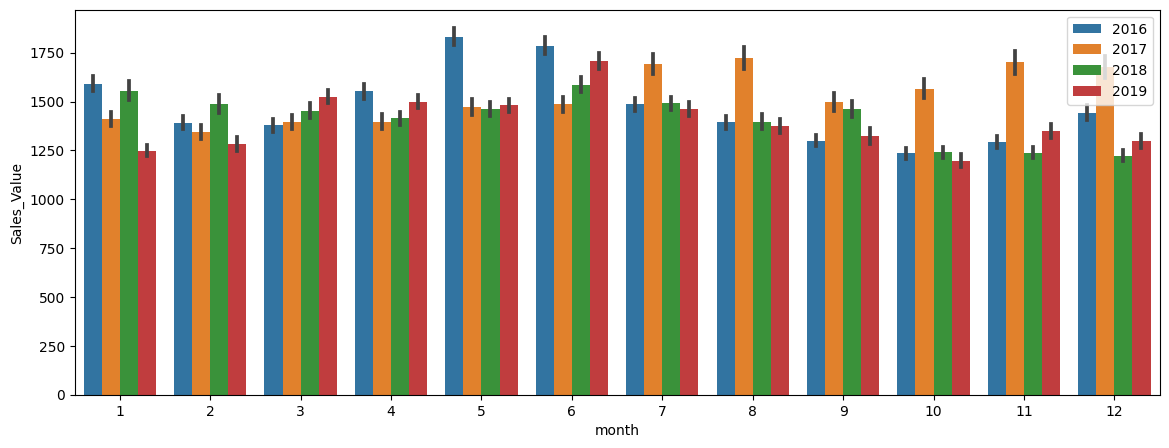

In [ ]:
fig , ax = plt.subplots(figsize=(14,5))
palette = sea.color_palette("mako_r",4)
a = sea.barplot(x='month',y = 'Sales_Value',hue='Year',data = sales_data)
plt.legend(loc='upper right');

Text(0.5, 1.0, 'Total Sales received By year')

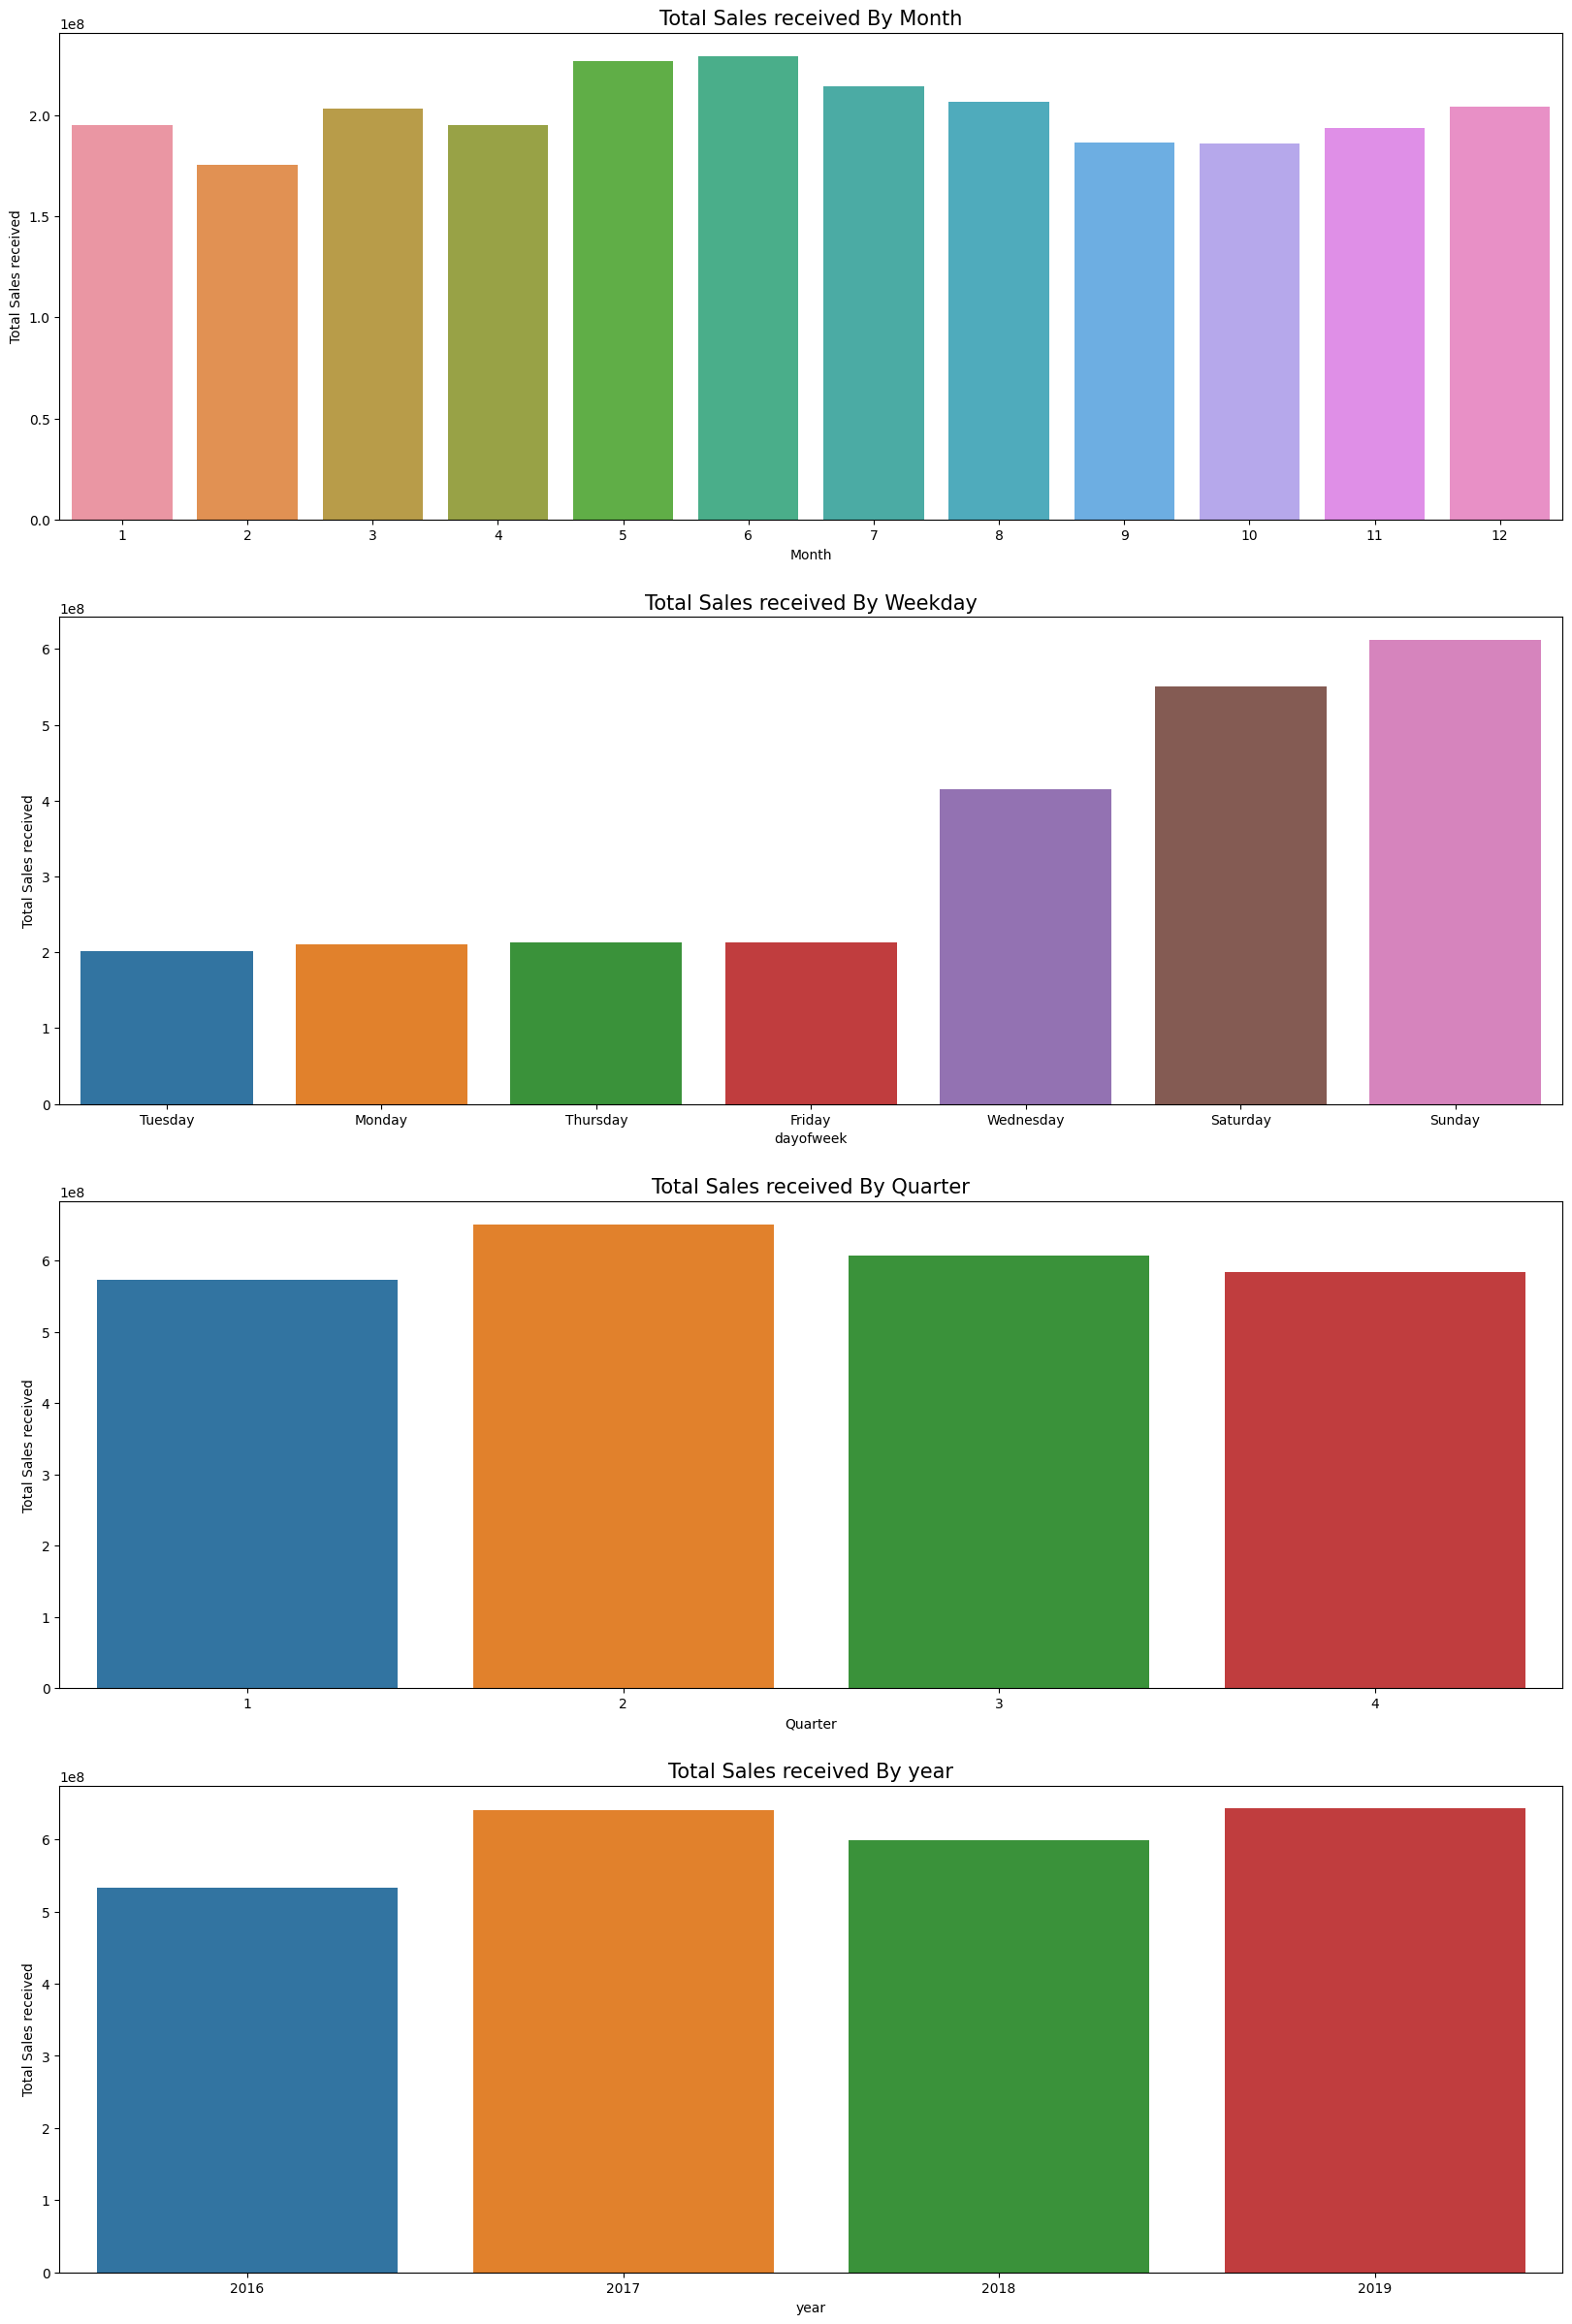

In [ ]:
fig,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=4)
fig.set_size_inches(20,30)

monthAggregated = pd.DataFrame(sales_data.groupby("month")["Sales_Value"].sum()).reset_index().sort_values('Sales_Value')
sea.barplot(data=monthAggregated,x="month",y="Sales_Value",ax=ax1)
ax1.set(xlabel='Month', ylabel='Total Sales received')
ax1.set_title("Total Sales received By Month",fontsize=15)

monthAggregated = pd.DataFrame(sales_data.groupby("dayofweek")["Sales_Value"].sum()).reset_index().sort_values('Sales_Value')
sea.barplot(data=monthAggregated,x="dayofweek",y="Sales_Value",ax=ax2)
ax2.set(xlabel='dayofweek', ylabel='Total Sales received')
ax2.set_title("Total Sales received By Weekday",fontsize=15)

monthAggregated = pd.DataFrame(sales_data.groupby("quarter")["Sales_Value"].sum()).reset_index().sort_values('Sales_Value')
sea.barplot(data=monthAggregated,x="quarter",y="Sales_Value",ax=ax3)
ax3.set(xlabel='Quarter', ylabel='Total Sales received')
ax3.set_title("Total Sales received By Quarter",fontsize=15)

monthAggregated = pd.DataFrame(sales_data.groupby("Year")["Sales_Value"].sum()).reset_index().sort_values('Sales_Value')
sea.barplot(data=monthAggregated,x="Year",y="Sales_Value",ax=ax4)
ax4.set(xlabel='year', ylabel='Total Sales received')
ax4.set_title("Total Sales received By year",fontsize=15)

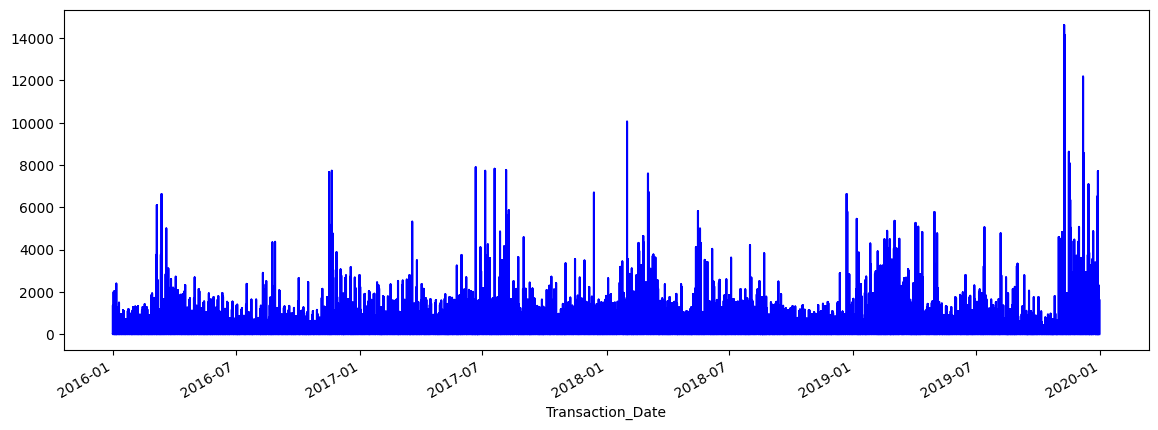

In [ ]:
pd.plotting.register_matplotlib_converters()
f, ax = plt.subplots(figsize=(14,5))
sales_data['Qty_Sold'].plot(kind='line', x='x', y='y', color='blue', ax=ax)
plt.show()

In [ ]:
pt = pd.pivot_table(sales_data,values= 'Total_Transactions',index = "Year",aggfunc=sum).style.background_gradient(cmap='Blues')
pt

In [ ]:
fig = px.line(pd.pivot_table(sales_data,values= 'Total_Transactions',index = "Year",aggfunc=sum),title="Trend",color_discrete_sequence=['red'])
fig.update_layout(xaxis_title="Year",yaxis_title="Qty_Sold")

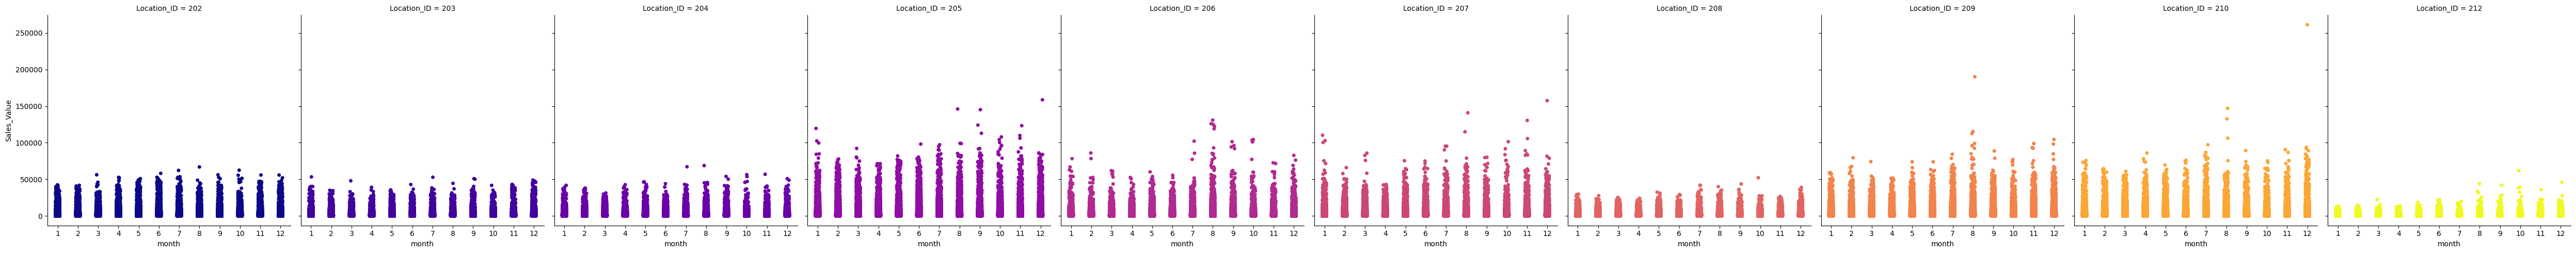

In [ ]:
sea.catplot(data = sales_data, x = 'month', y = "Sales_Value", 
               col = 'Location_ID', 
               palette = 'plasma',
               hue = 'Location_ID',color='#386B7F')

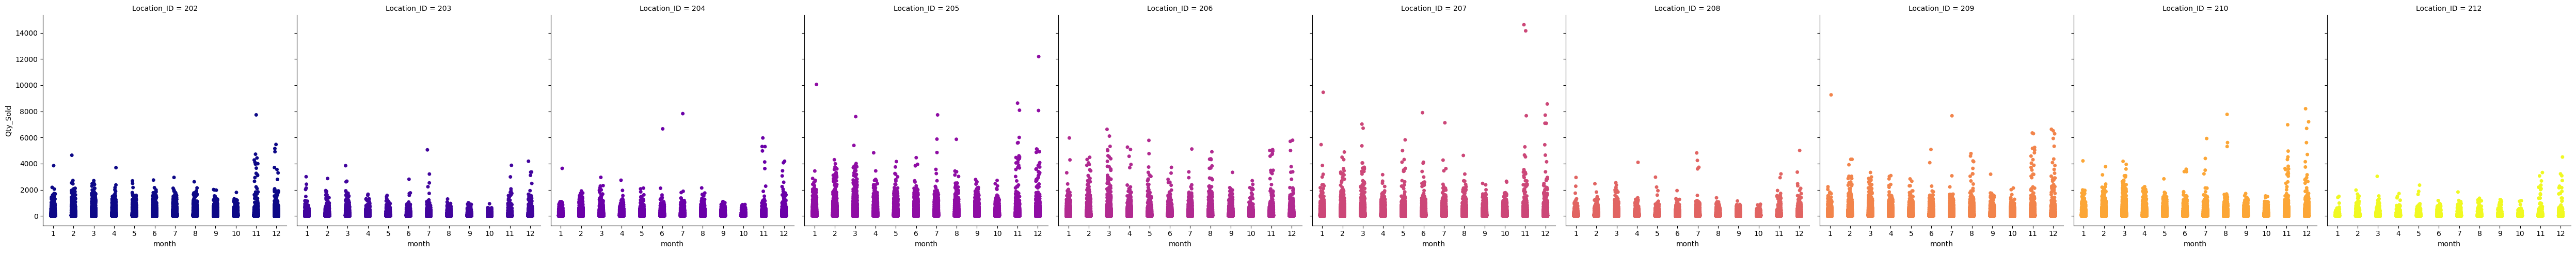

In [97]:

sea.catplot(data = sales_data, x = 'month', y = "Qty_Sold", 
               col = 'Location_ID', 
               palette = 'plasma',
               hue = 'Location_ID',color='#386B7F')

In [ ]:
sales_data['Trend'] = sales_data['Sales_Value'].rolling(window=24*30).mean()
sales_data['Seasonal'] = sales_data.groupby(sales_data['date'].dt.month)['Sales_Value'].transform('mean')


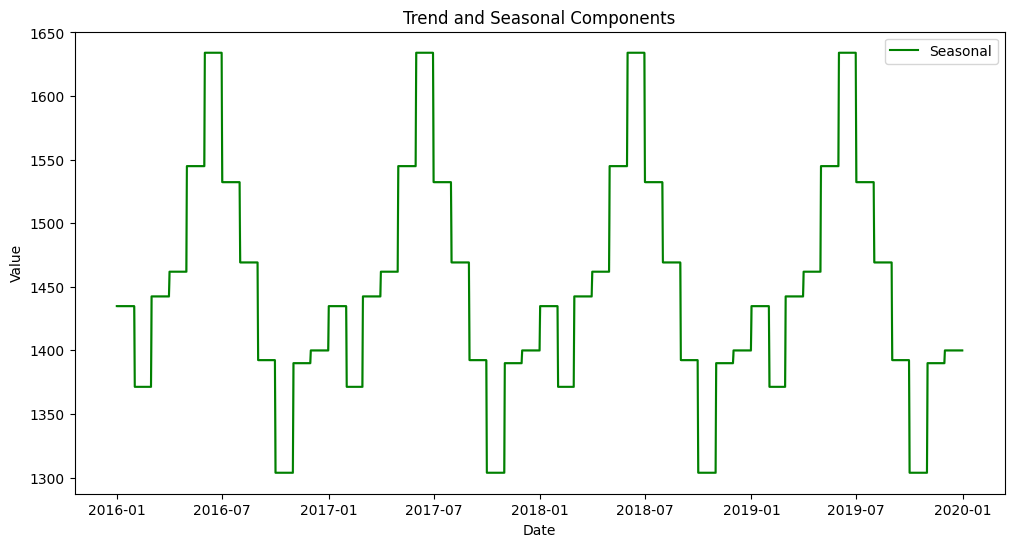

In [ ]:
plt.figure(figsize=(12, 6))
sea.lineplot(data=sales_data, x='date', y='Seasonal', color='green', label='Seasonal')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Trend and Seasonal Components')
plt.legend()
plt.show()


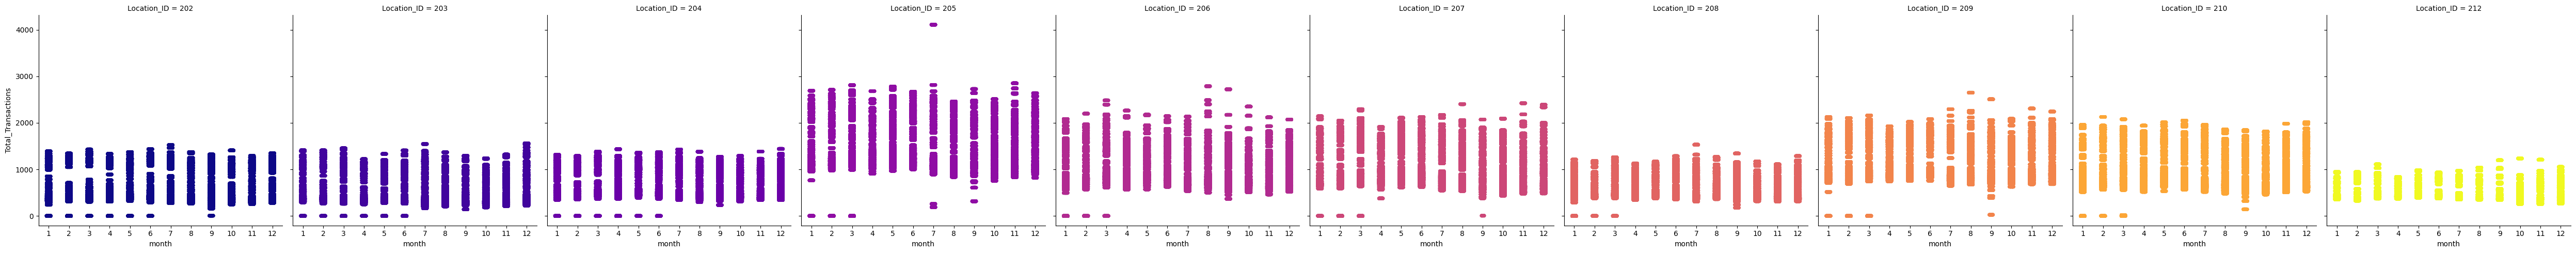

In [96]:
sea.catplot(data = sales_data, x = 'month', y = "Total_Transactions", 
               col = 'Location_ID', 
               palette = 'plasma',
               hue = 'Location_ID',color='#386B7F')

In [99]:
px.line(sales_data, y='Trend')

In [ ]:
store_details

Location_ID     Store_Name  TotalArea_SqFt       City              Address
0          202       Sarjapur    72728.230053     Mumbai        Inifinti Mall
1          203       Madiwala    58667.417571       Pune  Phoneix Market City
2          204        Kemfort    55737.536255    Chennai       Express Avenue
3          205    Mahadevpura    49907.415822  Hyderabad           Orbit Mall
4          206     Bulltemple    47734.305387     Mysore           Forum Mall
5          207            OMR    43771.961298     Kerala        Centre Square
6          208      Vaishnavi    38772.984415      Delhi         Pacific Mall
7          209  Sahakar Nagar    36058.129232    Kolkata            Acropolis
8          210     Marathalli    37947.155118  Ahmedabad     Kaivanna Complex
9          212       JP Nagar    32456.000000    Gurgaon        MGC Mega City

In [ ]:
store_details[['TotalArea_SqFt']].describe()

TotalArea_SqFt
count       10.000000
mean     47378.113515
std      12352.633812
min      32456.000000
25%      38153.612442
50%      45753.133342
75%      54280.006147
max      72728.230053

In [ ]:
store_details.dtypes


Location_ID         int64
Store_Name         object
TotalArea_SqFt    float64
City               object
Address            object
dtype: object

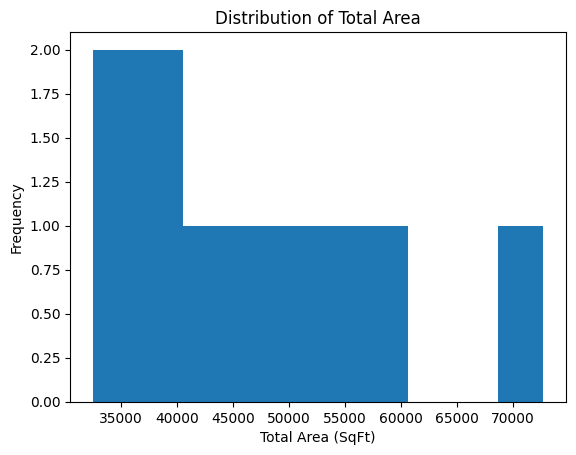

In [ ]:
plt.hist(store_details['TotalArea_SqFt'], bins=10)
plt.xlabel('Total Area (SqFt)')
plt.ylabel('Frequency')
plt.title('Distribution of Total Area')
plt.show()


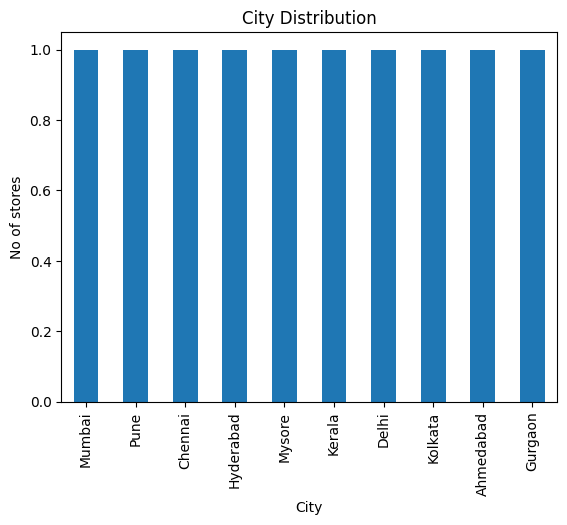

In [ ]:
store_details['City'].value_counts().plot(kind='bar')
plt.xlabel('City')
plt.ylabel('No of stores')
plt.title('City Distribution')
plt.show()